В файле <i>orders</i> представлена информация о заказах в онлайн-магазине.
```
OrderID - ID Заказа,
UserID - ID клиента,
OrderTime - время заказа,
items - список элементов в заказе, каждый элемент описан словарем:
    ItemID  - ID продукта, 
    price - цена единицы товара, 
    quantity - количество единиц товара в заказе
```
В файле <i>categories</i> представлена информация о категории товаров.
```
ItemID - ID продукта,
Category - категория продукта,
ParentCategory - более крупная категория продукта
```

## Анализ логов продуктового магазина

Представьте, что вы работаете аналитиком онлайн-магазина и ваша цель - повысить GMV (суммарную выручку от продажи товаров). Для этого вы хотите провести ряд исследований и придумать какие-то меры для увеличения выручки.

* Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продажах?
* Исследуйте и покажите на графике, как отличаются продажи в будние и выходные в категориях 'Сокосодержащие напитки, смузи' и "Печенье"  ?
* Визуализируйте структуру продаж ParentCategory по показателю GMV за один месяц. Укажите категорию с наибольшей долей GMV.
* Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода', 'Газированные напитки',  'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import numpy as np



In [75]:
# Для скачивания файлов из репозитория в Colab 
# !wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/categories.csv -P data
# !wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/orders.json -P data

In [76]:
categories = pd.read_csv('data/categories.csv')
orders = pd.read_json('data/orders.json')

In [77]:
categories.head()


,ItemID,Category,ParentCategory
0,1000002,Сладости для диабетиков,Сладости
1,1000046,Вода,Напитки
2,1000048,Сладости для диабетиков,Сладости
3,1000049,Вода,Напитки
4,1000061,Фрукты,Овощи и фрукты


In [78]:
orders.head()

,OrderID,UserID,OrderTime,items,Date
0,90659865,1.609460e+18,2021-01-01 03:51:42,"[{'ItemID': '413736', 'price': 36.72, 'quantit...",2021-01-01
1,90622054,2.499293e+18,2021-01-01 04:13:13,"[{'ItemID': '961454', 'price': 179.9, 'quantit...",2021-01-01
2,90659952,3.945866e+17,2021-01-01 05:48:53,"[{'ItemID': '306553', 'price': 101.9, 'quantit...",2021-01-01
3,89765281,5.412765e+18,2021-01-01 08:33:41,"[{'ItemID': '979703', 'price': 99.9, 'quantity...",2021-01-01
4,90582308,6.380061e+18,2021-01-01 09:55:35,"[{'ItemID': '303765', 'price': 44.9, 'quantity...",2021-01-01


In [79]:
exploded_orders = orders.explode('items', ignore_index = True)
exploded_orders.head(); 
pd.json_normalize(exploded_orders['items']); 
all_orders = pd.concat([exploded_orders.drop('items', axis = 1), \
           pd.json_normalize(exploded_orders['items'])], axis = 1)
all_orders.head(); 
all_orders['GMV'] = all_orders.price * all_orders.quantity
all_orders.head(); 
ord_cat = pd.merge(all_orders, categories, how='inner', left_index=True, right_on='ItemID')
ord_cat.head(); 


In [80]:
ord_cat.head()

,ItemID,OrderID,UserID,OrderTime,Date,ItemID_x,price,quantity,GMV,ItemID_y,Category,ParentCategory
5320,303665,91418396,8.420668e+18,2021-02-27 22:27:56,2021-02-27,318617,46.9,1,46.9,303665,Чай,Напитки
5321,303666,91418396,8.420668e+18,2021-02-27 22:27:56,2021-02-27,314354,109.9,1,109.9,303666,Овощи,Овощи и фрукты
5322,303669,91418396,8.420668e+18,2021-02-27 22:27:56,2021-02-27,314397,24.9,2,49.8,303669,Фрукты,Овощи и фрукты
5323,303670,91418396,8.420668e+18,2021-02-27 22:27:56,2021-02-27,954346,89.9,1,89.9,303670,Фрукты,Овощи и фрукты
5324,303671,91418396,8.420668e+18,2021-02-27 22:27:56,2021-02-27,309378,46.9,1,46.9,303671,Фрукты,Овощи и фрукты


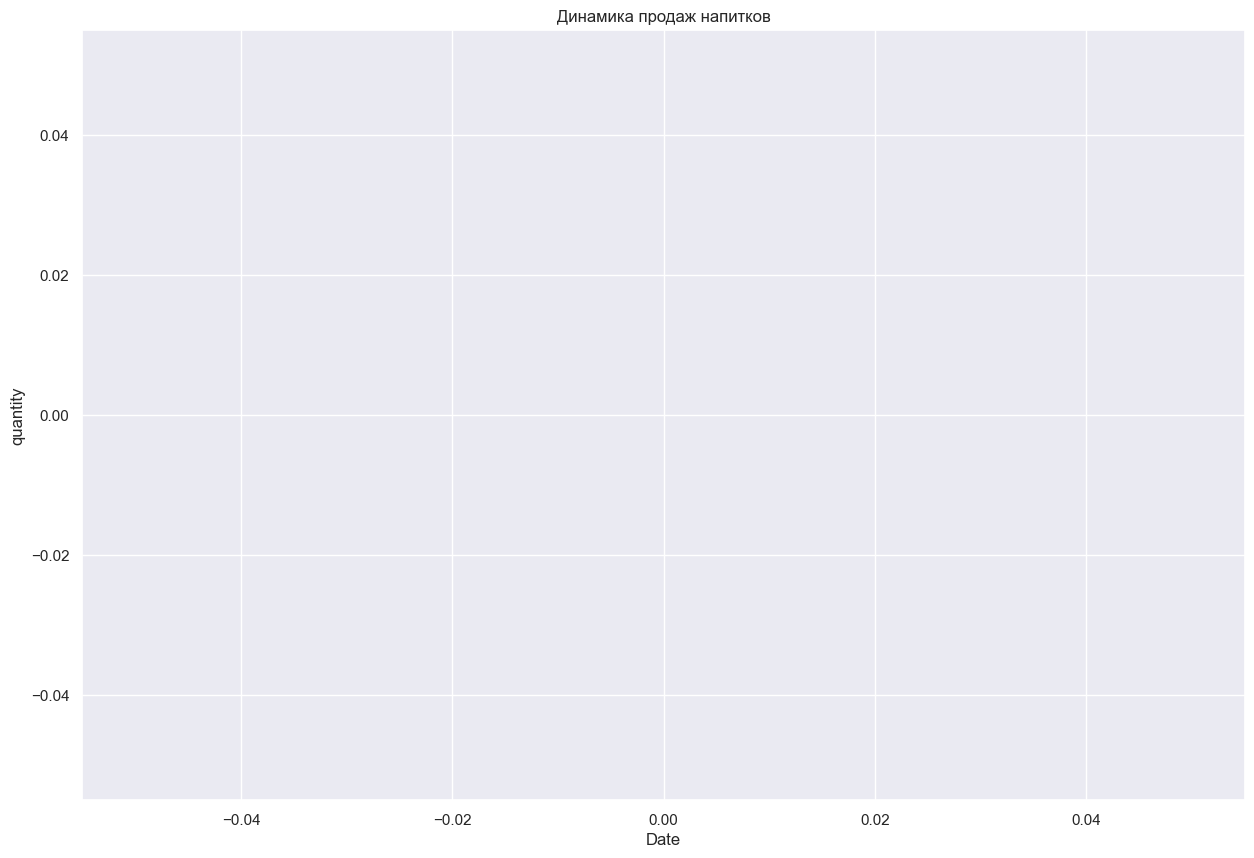

In [81]:

# Задача 1: Динамика продаж напитков в ParentCategory

# Фильтрация данных по напиткам
drinks = ord_cat[ord_cat['ParentCategory'].str.contains("Напиток")]
drinks['Date'] = drinks['OrderTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
drinks = drinks.groupby(['Date'], as_index=False).agg({'quantity': 'sum'}); 

# График динамики продаж напитков
plt.figure()
sns.lineplot(data=drinks, x="Date", y="quantity")
plt.title("Динамика продаж напитков")
plt.show()

In [82]:

drinks_weekend.columns

Index(['ItemID', 'OrderID', 'UserID', 'OrderTime', 'Date', 'ItemID_x', 'price',
       'quantity', 'GMV', 'ItemID_y', 'Category', 'ParentCategory'],
      dtype='object')

In [83]:
drinks_weekend.head()

,ItemID,OrderID,UserID,OrderTime,Date,ItemID_x,price,quantity,GMV,ItemID_y,Category,ParentCategory


In [84]:
df = ord_cat.assign(quantity=ord_cat['quantity'])

In [50]:
cookies_weekend.columns

Index(['ItemID', 'OrderID', 'UserID', 'OrderTime', 'Date', 'ItemID_x', 'price',
       'quantity', 'GMV', 'ItemID_y', 'Category', 'ParentCategory'],
      dtype='object')

In [85]:

drinks_weekend = ord_cat[ord_cat['Category'].str.contains("Напиток")]
drinks_weekend = drinks_weekend.assign(quantity=drinks_weekend['quantity'])


In [86]:
drinks_weekend.columns

Index(['ItemID', 'OrderID', 'UserID', 'OrderTime', 'Date', 'ItemID_x', 'price',
       'quantity', 'GMV', 'ItemID_y', 'Category', 'ParentCategory'],
      dtype='object')

In [56]:
juices_weekend = ord_cat[ord_cat['Category'].str.contains("Сокосодержащие напитки")]
juices_weekend = juices_weekend.assign(quantity=juices_weekend['quantity'])

In [57]:
juices_weekend.columns

Index(['ItemID', 'OrderID', 'UserID', 'OrderTime', 'Date', 'ItemID_x', 'price',
       'quantity', 'GMV', 'ItemID_y', 'Category', 'ParentCategory'],
      dtype='object')

C:\Users\warcr\AppData\Local\Temp\ipykernel_19300\3428410419.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


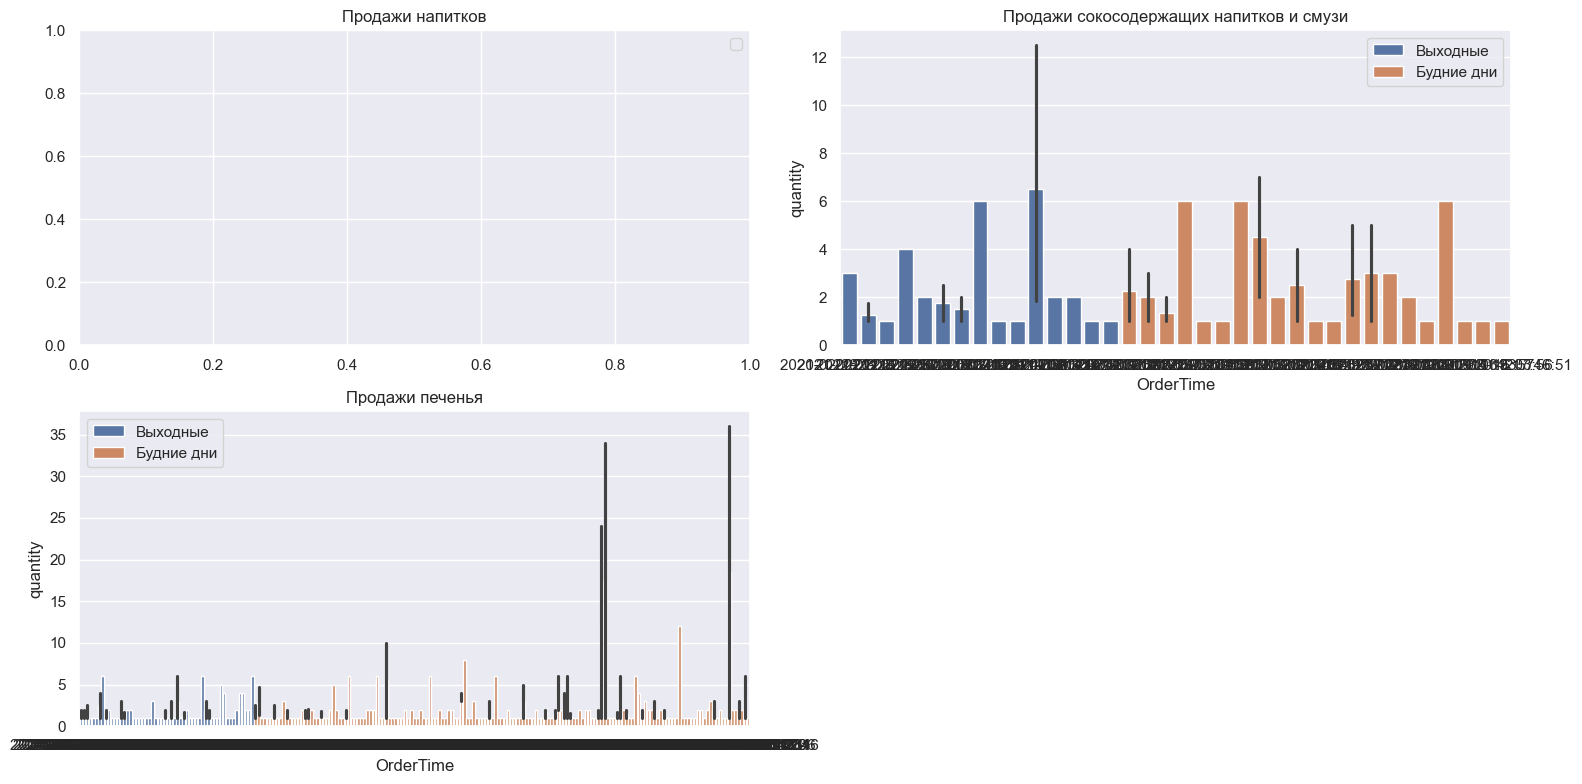

In [87]:
# Задача 2: Сравнение продаж в будние и выходные дни

# Определение будних и выходных дней
def is_weekday(dt):
    return dt.weekday() < 5

# Группировка данных по дням недели
days = ord_cat['OrderTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
drinks_weekend = ord_cat[(ord_cat['Category'].str.contains("Напиток")) & ~days.apply(is_weekday)]
drinks_weekend = drinks_weekend.assign(quantity=drinks_weekend['quantity'])
juices_weekend = ord_cat[(ord_cat['Category'].str.contains("Сокосодержащие напитки")) & ~days.apply(is_weekday)]
juices_weekend = juices_weekend.assign(quantity=juices_weekend['quantity'])
cookies_weekend = ord_cat[(ord_cat['Category'].str.contains("Печенье")) & ~days.apply(is_weekday)]
cookies_weekend = cookies_weekend.assign(quantity=cookies_weekend['quantity'])

drinks_weekday = ord_cat[(ord_cat['Category'].str.contains("Напиток")) & days.apply(is_weekday)]
drinks_weekday = drinks_weekday.assign(quantity=drinks_weekday['quantity'])
juices_weekday = ord_cat[(ord_cat['Category'].str.contains("Сокосодержащие напитки")) & days.apply(is_weekday)]
juices_weekday = juices_weekday.assign(quantity=juices_weekday['quantity'])
cookies_weekday = ord_cat[(ord_cat['Category'].str.contains("Печенье")) & days.apply(is_weekday)]
cookies_weekday = cookies_weekday.assign(quantity=cookies_weekday['quantity'])

# Построение графиков
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.barplot(data=drinks_weekend, x="OrderTime", y="quantity", label="Выходные")
sns.barplot(data=drinks_weekday, x="OrderTime", y="quantity", label="Будние дни")
plt.title("Продажи напитков")
plt.legend()

plt.subplot(2, 2, 2)
sns.barplot(data=juices_weekend, x="OrderTime", y="quantity", label="Выходные")
sns.barplot(data=juices_weekday, x="OrderTime", y="quantity", label="Будние дни")
plt.title("Продажи сокосодержащих напитков и смузи")
plt.legend()

plt.subplot(2, 2, 3)
sns.barplot(data=cookies_weekend, x="OrderTime", y="quantity", label="Выходные")
sns.barplot(data=cookies_weekday, x="OrderTime", y="quantity", label="Будние дни")
plt.title("Продажи печенья")
plt.legend()

plt.tight_layout()
plt.show()

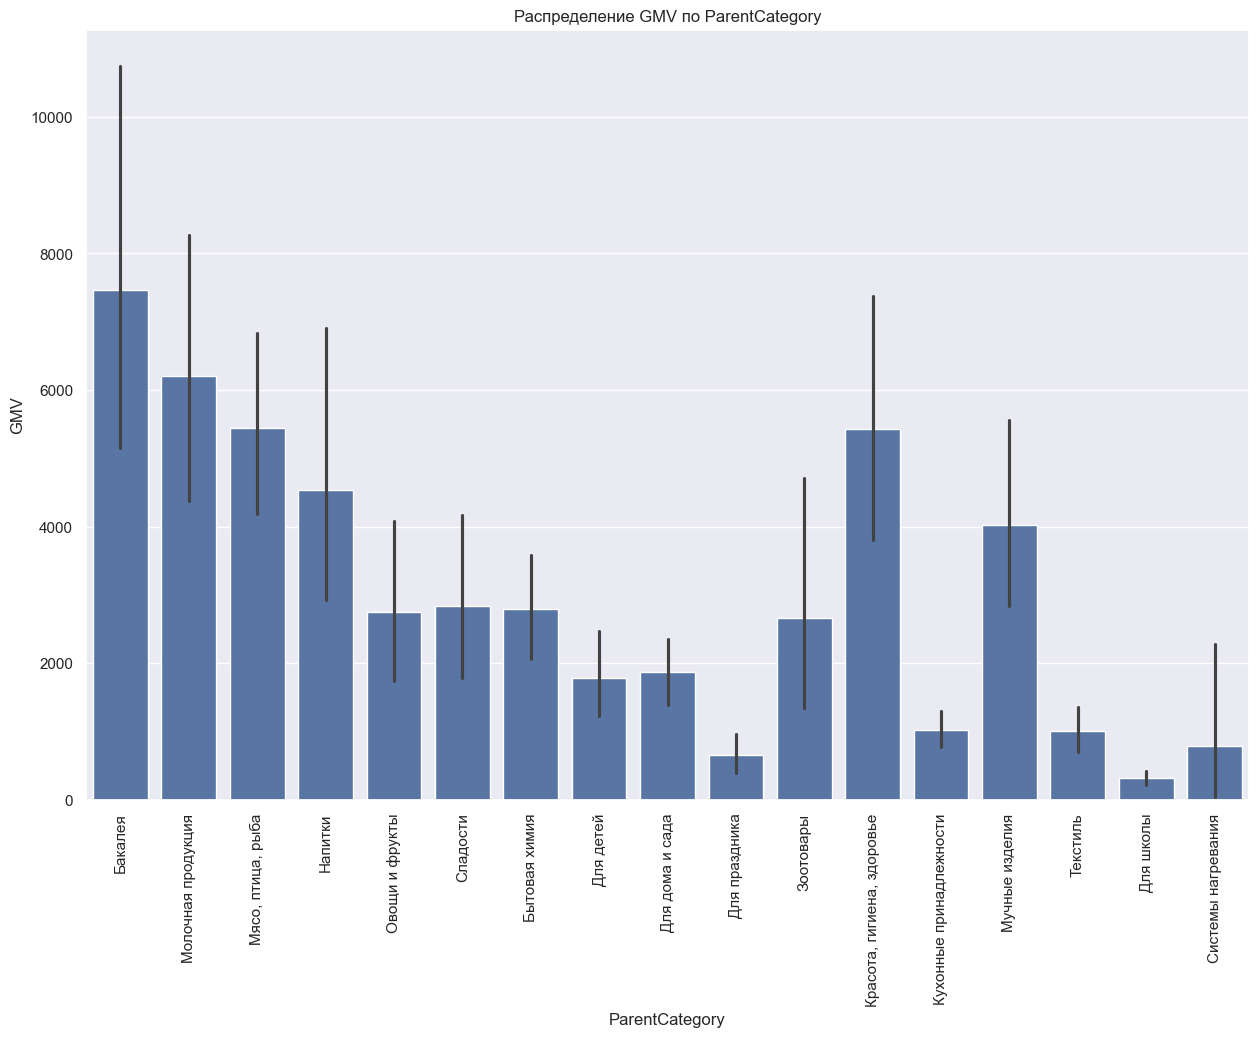

In [88]:
# Задача 3: Структура продаж ParentCategory по GMV за месяц

# Добавление общего количества проданных единиц в DataFrame
df['TotalQuantity'] = ord_cat['quantity'].astype(int) * ord_cat['price'].astype(float)

# Группировка по месяцу и ParentCategory
gmv_monthly = df.groupby(['Date', 'ParentCategory'], as_index=False).agg({'TotalQuantity': 'sum'})

# Построение гистограммы распределения GMV по ParentCategory
plt.figure()
sns.set(rc={'figure.figsize': (15, 10)})
ax = sns.barplot(data=gmv_monthly, x='ParentCategory', y='TotalQuantity')
ax.set_ylabel('GMV')
plt.title("Распределение GMV по ParentCategory")
plt.xticks(rotation=90)
plt.show()


C:\Users\warcr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


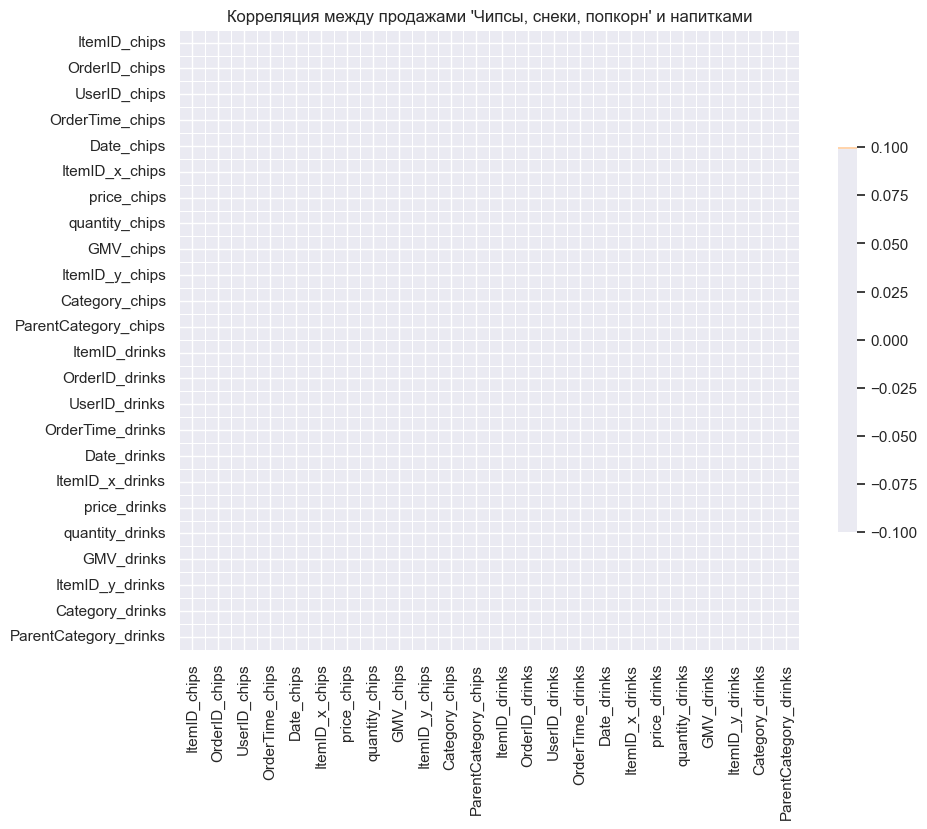

In [99]:
# Задача 4: Корреляция между продажами категорий 'Чипсы, снеки, попкорн' и напитками

# Фильтрация данных по категориям
chips_snacks_popcorn = ord_cat[ord_cat['Category'].str.contains("Чипсы|Снеки|Попкорн")]
drinks = ord_cat[ord_cat['Category'].str.contains("Напиток")]

# Построение матрицы корреляций
corr = chips_snacks_popcorn.join(drinks, lsuffix='_chips', rsuffix='_drinks')\
                            .dropna().corr(method='pearson')

# Визуализация матрицы корреляций
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0)
plt.title("Корреляция между продажами 'Чипсы, снеки, попкорн' и напитками")
plt.show()